In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
from mppi import InputFiles as I, Calculators as C, Datasets as D

# Analysis of the system in function of the field intensity

We perform a study of the response of the system, in terms of number of carriers and spin magnetization, w.r.t. the field intensity.

The first step is a sort of convergence study in terms of the dephasing vs k-sampling dimension, performed for sampling around Gamma

## Dephasing vs grid dimension analysis

We consider random grids with 50 and 100 points around Gamma and study the variation of the number of carriers at T=600 fs (for pulse width of 100 fs) in function of the dephasing.

In [2]:
k50_data = 'rt_k50random_no-com/FixSymm/'
k100_data = 'rt_k100random_no-com/FixSymm/'

In [125]:
file = k50_data + 'Int_1000-dephase_0.002-freq_1.55/o-Int_1000-dephase_0.002-freq_1.55.carriers'
car_50_002 = C.dict_parser(file)
file = k50_data + 'Int_1000-dephase_0.005-freq_1.55/o-Int_1000-dephase_0.005-freq_1.55.carriers'
car_50_005 = C.dict_parser(file)

file = k100_data + 'Int_1000-dephase_0.002-freq_1.55/o-Int_1000-dephase_0.002-freq_1.55.carriers'
car_100_002 = C.dict_parser(file)
file = k100_data + 'Int_1000-dephase_0.005-freq_1.55/o-Int_1000-dephase_0.005-freq_1.55.carriers'
car_100_005 = C.dict_parser(file)

# perform one computation with higher value of the dephasing to reproduce the previous results
file = k100_data + 'Int_1000-dephase_0.05-freq_1.55/o-Int_1000-dephase_0.05-freq_1.55.carriers'
car_100_05 = C.dict_parser(file)

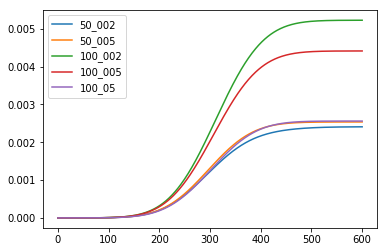

In [126]:
plt.plot(car_50_002['time'],car_50_002['dN_elec'],label='50_002')
plt.plot(car_50_005['time'],car_50_005['dN_elec'],label='50_005')
plt.plot(car_100_002['time'],car_100_002['dN_elec'],label='100_002')
plt.plot(car_100_005['time'],car_100_005['dN_elec'],label='100_005')
plt.plot(car_100_05['time'],car_100_05['dN_elec'],label='100_05')
plt.legend()

On the basis of this analysis we see that the grid with 50 points give different results w.r.t the one with 100 point, so we use the higher one (further tests considering even greater grids should be performed). 

For the dephasing we choose the value of 2 meV since the field width of 100 fs correspond to an energy spread of 40 meV and we adopt the criterion of having a dephase about 1/10 of the pulse width. The choice of 2 meV is applied both to valence and conduction states thus providing a total dephase of 4 meV.

We can perform a similar analysis also looking at the results for the magnetization

In [127]:
file = k50_data + 'Int_1000-dephase_0.002-freq_1.55/o-Int_1000-dephase_0.002-freq_1.55.spin_magnetization'
mgn_50_002 = C.dict_parser(file)
file = k50_data + 'Int_1000-dephase_0.005-freq_1.55/o-Int_1000-dephase_0.005-freq_1.55.spin_magnetization'
mgn_50_005 = C.dict_parser(file)

file = k100_data + 'Int_1000-dephase_0.002-freq_1.55/o-Int_1000-dephase_0.002-freq_1.55.spin_magnetization'
mgn_100_002 = C.dict_parser(file)
file = k100_data + 'Int_1000-dephase_0.005-freq_1.55/o-Int_1000-dephase_0.005-freq_1.55.spin_magnetization'
mgn_100_005 = C.dict_parser(file)

# perform one computation with higher value of the dephasing to reproduce the previous results
file = k100_data + 'Int_1000-dephase_0.05-freq_1.55/o-Int_1000-dephase_0.05-freq_1.55.spin_magnetization'
mgn_100_05 = C.dict_parser(file)

In [128]:
mgn_100_002.keys()

dict_keys(['Mc_x', 'Ms_z', 'Ms_y', 'Mc_z', 'Mv_z', 'Mv_x', 'Ms_x', 'Mv_y', 'Mc_y', 'T'])

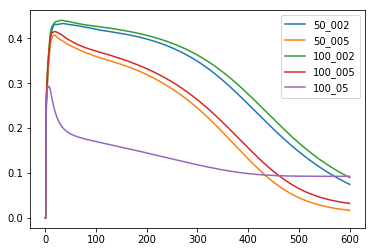

In [129]:
plt.plot(mgn_50_002['T'],mgn_50_002['Mc_z'],label='50_002')
plt.plot(mgn_50_005['T'],mgn_50_005['Mc_z'],label='50_005')
plt.plot(mgn_100_002['T'],mgn_100_002['Mc_z'],label='100_002')
plt.plot(mgn_100_005['T'],mgn_100_005['Mc_z'],label='100_005')
plt.plot(mgn_100_05['T'],mgn_100_05['Mc_z'],label='100_05')
plt.legend()

Results for dephase = 0.05 are different from the ones obtained previously because the threshold level in the Fortran routine has been changed!

## Intensity tests 

Once defined the values for the grid sampling and dephasing we test how the number of carriers and spin magnetization scale w.r.t. the field intensity. 

It is better to express the number of carriers per cm^3 instead of per cell, as given by yambo. The conversion is realized by rescaling times the volume of the cell (expressed in a.u. by QE and converted in cm^3)

In [8]:
Ha = 0.528e-8
vol_cel = 304.29*(Ha**3)

so, for instance, a value of 5e-3 gives

In [9]:
5e-3/vol_cel

1.116299053557959e+20

We want to test the response of the systems in the carriers range that goes up to 1e22

In [10]:
field_ints = [1000,5000,10000,15000,20000,25000,30000,40000,50000,60000,70000]

In [11]:
carriers = []
results = []
for f in field_ints:
    file = k100_data + 'Int_%s-dephase_0.002-freq_1.55/o-Int_%s-dephase_0.002-freq_1.55.carriers' %(f,f)
    data = C.dict_parser(file)
    results.append(data)
    carriers.append(data['dN_elec'][-1]/vol_cel)
    

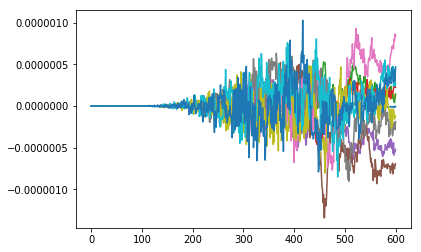

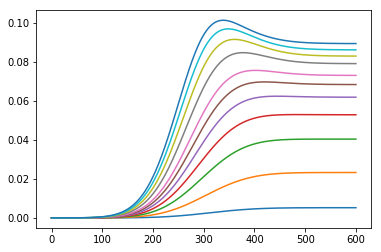

In [14]:
for r in results:
    plt.plot(r['time'],r['d(N_hole-N_elec)'])
plt.show()
for r in results:
    plt.plot(r['time'],r['dN_elec'])

In [184]:
results[0].keys()

dict_keys(['dN_elec', 'dN_hole', 'time', 'd(N_hole-N_elec)'])

In [185]:
carriers

[1.1662954679896816e+20,
 5.18823405318465e+20,
 9.003956766050748e+20,
 1.1783024565180866e+21,
 1.3791460371754558e+21,
 1.523723433858459e+21,
 1.6281794219136228e+21,
 1.7629603011187565e+21,
 1.8489833197854736e+21,
 1.9202708087244293e+21,
 1.9919106087890023e+21]

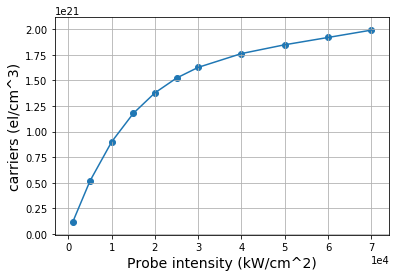

In [24]:
plt.plot(field_ints,carriers)
plt.scatter(field_ints,carriers)
plt.xlabel('Probe intensity (kW/cm^2)',size=14)
plt.ylabel('carriers (el/cm^3)',size=14)
plt.grid()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Perform the same computation using the velocity gauge

In [187]:
carriers_gv = []
results_gv = []
for f in field_ints:
    file = k100_data + 'Int_%s-dephase_0.002-freq_1.55-gauge_velocity/o-Int_%s-dephase_0.002-freq_1.55-gauge_velocity.carriers' %(f,f)
    data = C.dict_parser(file)
    results_gv.append(data)
    carriers_gv.append(data['dN_elec'][-1]/vol_cel)

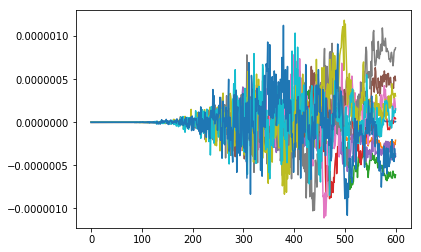

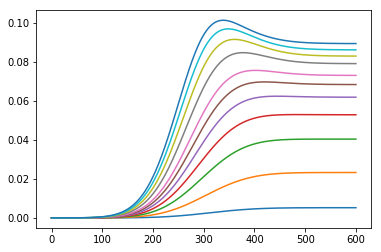

In [188]:
for r in results_gv:
    plt.plot(r['time'],r['d(N_hole-N_elec)'])
plt.show()
for r in results:
    plt.plot(r['time'],r['dN_elec'])

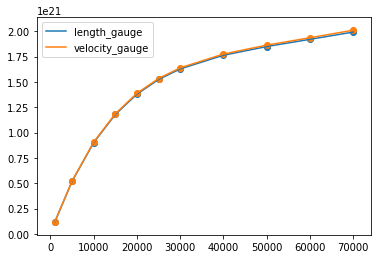

In [189]:
plt.plot(field_ints,carriers,label='length_gauge')
plt.scatter(field_ints,carriers)
plt.plot(field_ints,carriers_gv,label='velocity_gauge')
plt.scatter(field_ints,carriers_gv)
plt.legend()

## Test of the magnetization scaling

In [25]:
results = []
for f in field_ints:
    file = k100_data + 'Int_%s-dephase_0.002-freq_1.55/o-Int_%s-dephase_0.002-freq_1.55.spin_magnetization' %(f,f)
    data = C.dict_parser(file)
    results.append(data)

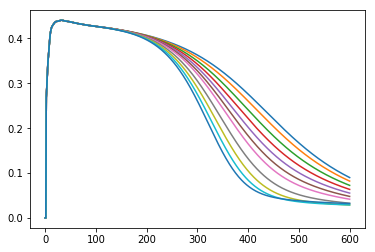

In [26]:
for r in results:
    plt.plot(r['T'],r['Mc_z'])

In [192]:
results_vg = []
for f in field_ints:
    file = k100_data + 'Int_%s-dephase_0.002-freq_1.55-gauge_velocity/o-Int_%s-dephase_0.002-freq_1.55-gauge_velocity.spin_magnetization' %(f,f)
    data = C.dict_parser(file)
    results_vg.append(data)

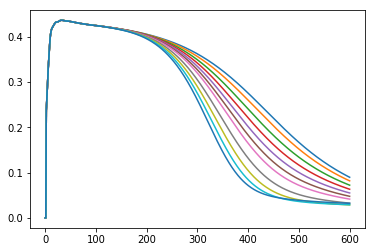

In [193]:
for r in results_vg:
    plt.plot(r['T'],r['Mc_z'])